<a href="https://colab.research.google.com/github/anders447/sample-ds-blog-anders/blob/master/2021-04-05_car_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car detector

In [1]:
!pip3 install git+https://github.com/fastai/fastai.git@06848de7904f6657ac5624082694915628762a2d
import fastbook
fastbook.setup_book()

  Cloning https://github.com/fastai/fastai.git (to revision 06848de7904f6657ac5624082694915628762a2d) to /tmp/pip-req-build-q0ylc9eg
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-q0ylc9eg
  Running command git checkout -q 06848de7904f6657ac5624082694915628762a2d
     |████████████████████████████████| 12.8MB 10.7MB/s 
     |████████████████████████████████| 776.8MB 25kB/s 
  Created wheel for fastai: filename=fastai-2.3.1-cp37-none-any.whl size=192786 sha256=e3efda78d22c2f54c04e06dea7c3aa817f6d6063b0f5d17c0b0b29a3583e7d44
  Stored in directory: /tmp/pip-ephem-wheel-cache-dlfo4tbz/wheels/43/2f/2f/e251e2c1c0f1d4c39beb16e4ea616250e8b21766a2a3b1281a
Successfully built fastai
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvisio

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import xml.etree.ElementTree as ET

In [3]:
import zipfile
with zipfile.ZipFile("/content/gdrive/MyDrive/SelfDrivingCarDataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
# Pathing til mappen
path = Path("/content/export")
Path.BASE_PATH = path
path.ls().sorted()

(#30000) [Path('1478019952686311006_jpg.rf.a8dc9db36ae4a7e6ecf234f85885a153.jpg'),Path('1478019952686311006_jpg.rf.a8dc9db36ae4a7e6ecf234f85885a153.xml'),Path('1478019953180167674_jpg.rf.a867d5d390d81f5ccfb855463711bc5b.jpg'),Path('1478019953180167674_jpg.rf.a867d5d390d81f5ccfb855463711bc5b.xml'),Path('1478019953689774621_jpg.rf.3cc61c5c050dfd04456823d102bdfdf1.jpg'),Path('1478019953689774621_jpg.rf.3cc61c5c050dfd04456823d102bdfdf1.xml'),Path('1478019954186238236_jpg.rf.eebc37d396bcff8efdda2dcccb23a267.jpg'),Path('1478019954186238236_jpg.rf.eebc37d396bcff8efdda2dcccb23a267.xml'),Path('1478019954685370994_jpg.rf.f64f429db0c352326724fddc95fa23cb.jpg'),Path('1478019954685370994_jpg.rf.f64f429db0c352326724fddc95fa23cb.xml')...]

In [5]:
img_files = get_image_files(path)

In [6]:
def img2xml(x): return Path(f'{str(x)[:-3]}xml')

def get_label(x):
  result = []

  tree = ET.parse(img2xml(x))
  root = tree.getroot()

  for CarObject in root.iter('object'):
    if CarObject[0].text == 'car':
      result.append('')

  if not result:
    result.append('')

  return result


def get_bbx(x):
  tree = ET.parse(img2xml(x))
  root = tree.getroot()
  bbox = []

  for CarObject in root.iter('object'):
    if CarObject[0].text == 'car':
      for boxes in CarObject.iter('bndbox'):
          bbox += [[int(boxes[1].text), int(boxes[3].text),int(boxes[0].text),int(boxes[2].text)]]

  if not bbox:
    bbox += [[0,0,0,0]]

  return bbox

get_y = [ get_bbx, get_label ]

In [10]:
### Træning af model

In [7]:
cars = DataBlock(
    blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_items=get_image_files,
    n_inp=1,
    get_y=get_y,
    item_tfms=Resize(512)
)

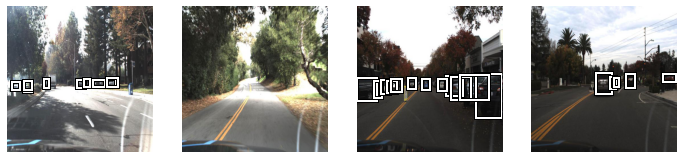

In [9]:
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)